#### The actual data-based clustering is carried out in this notebook. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("normalized_sales_summary.csv")
display(df.head())

,description,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,...,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,total_normalized_quantity,max_month
0,12 EGG HOUSE PAINTED WOOD,0.141243,1.000000,0.096045,0.169492,0.129944,0.039548,0.016949,0.039548,0.050847,...,0.016949,0.016949,0.016949,0.011299,0.039548,0.084746,0.107345,0.000000,2.757062,2010-01
1,12 PENCILS SMALL TUBE SKULL,0.211029,0.213235,0.520588,0.436765,0.194118,0.300000,0.403676,0.202206,0.218382,...,0.385294,0.586765,0.257353,0.549265,0.250735,0.654412,0.304412,0.000000,9.299265,2010-11
2,12 PENCILS TALL TUBE SKULLS,0.700787,0.036220,0.267717,0.270866,0.119685,0.275591,0.129134,0.130709,0.160630,...,0.064567,0.017323,0.080315,0.201575,0.329134,0.355906,1.000000,0.100787,6.179528,2011-11
3,12 PENCILS TALL TUBE WOODLAND,0.601108,0.684211,1.000000,0.531856,0.343490,0.144044,0.141274,0.160665,0.387812,...,0.592798,0.013850,0.454294,0.351801,0.631579,0.252078,0.972299,0.024931,10.119114,2010-02
4,12 RED ROSE PEG PLACE SETTINGS,0.383459,0.413534,0.000000,0.436090,0.556391,1.000000,0.210526,0.578947,0.278195,...,0.075188,0.240602,0.082707,0.052632,0.654135,0.090226,0.375940,0.067669,8.661654,2010-05


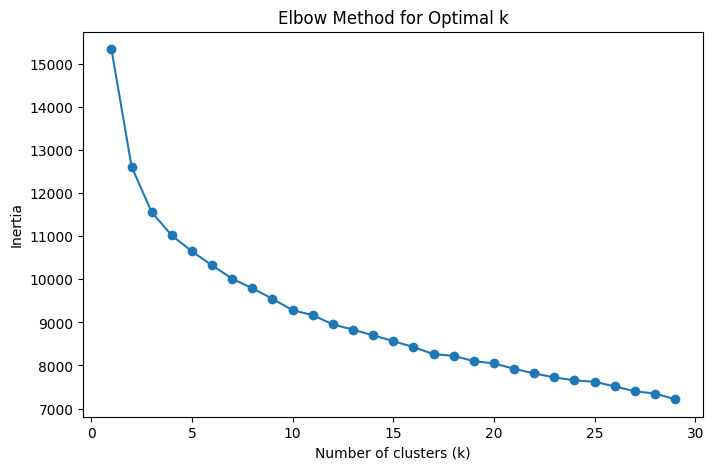

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

target_column = "description"
X = df.drop(columns=[target_column])

# Encode categorical variables
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to determine optimal clusters
inertia = []
k_range = range(1, 30)  # Try k from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [9]:
# Fit K-Means with optimal k (choose based on elbow plot)
optimal_k = 9  # Adjust based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Show clustered data
display(df[[target_column, "cluster"]])

,description,cluster
0,12 EGG HOUSE PAINTED WOOD,7
1,12 PENCILS SMALL TUBE SKULL,3
2,12 PENCILS TALL TUBE SKULLS,6
3,12 PENCILS TALL TUBE WOODLAND,2
4,12 RED ROSE PEG PLACE SETTINGS,1
...,...,...
543,WOVEN ROSE GARDEN CUSHION COVER,7
544,WRAP PINK FAIRY CAKES,8
545,ZINC HEART LATTICE T-LIGHT HOLDER,3
546,ZINC METAL HEART DECORATION,1


In [11]:
# Ensure 'total_normalized_quantity' is numeric
df["total_normalized_quantity"] = pd.to_numeric(df["total_normalized_quantity"], errors='coerce')

# Iterate over each cluster and display top 10 descriptions
for cluster_id in sorted(df["cluster"].unique()):
    top_descriptions = (
        df[df["cluster"] == cluster_id]
        .nlargest(10, "total_normalized_quantity")  # Get top 10 per cluster
        [[target_column, "total_normalized_quantity"]]
    )
    
    print(f"\nCluster {cluster_id} - Top 10 Descriptions:")
    display(top_descriptions)



Cluster 0 - Top 10 Descriptions:


,description,total_normalized_quantity
108,COLOURING PENCILS BROWN TUBE,7.923800
201,HEART CALCULATOR,7.619205
422,SET/4 BADGES DOGS,7.518519
413,SET OF 6 HEART CHOPSTICKS,7.236052
291,PACK 6 HEART/ICE-CREAM PATCHES,7.223776
248,LARGE STRIPES CHOCOLATE GIFT BAG,7.061776
171,FLYING PIG WATERING CAN,7.032258
273,MINI WOODEN HAPPY BIRTHDAY GARLAND,6.744113
60,BOTANICAL LAVENDER BIRTHDAY CARD,6.655844
122,DECORATION BUTTERFLY MAGIC GARDEN,6.521739



Cluster 1 - Top 10 Descriptions:


,description,total_normalized_quantity
142,EMPIRE BIRTHDAY CARD,11.276850
79,CERAMIC CAKE BOWL + HANGING CAKES,10.981132
178,FUNKY WASHING UP GLOVES ASSORTED,10.869403
66,CACTI T-LIGHT CANDLES,10.666893
470,SWEETHEART CERAMIC TRINKET BOX,10.354364
166,FILIGRIS HEART WITH BUTTERFLY,10.331230
444,SLATE TILE NATURAL HANGING,10.324251
424,SET/4 SKULL BADGES,10.320988
348,POTTERING IN THE SHED METAL SIGN,10.258410
435,SINGLE HEART ZINC T-LIGHT HOLDER,10.233510



Cluster 2 - Top 10 Descriptions:


,description,total_normalized_quantity
245,LARGE HEART MEASURING SPOONS,11.571809
498,VICTORIAN SEWING BOX MEDIUM,10.864078
401,SET OF 20 KIDS COOKIE CUTTERS,10.587280
3,12 PENCILS TALL TUBE WOODLAND,10.119114
481,TOAST ITS - FAIRY FLOWER,10.113924
281,MOUSE TOY WITH PINK T-SHIRT,9.788235
361,RED HANGING HEART T-LIGHT HOLDER,9.570312
526,WOOD 2 DRAWER CABINET WHITE FINISH,9.346008
329,PINK FLORAL FELTCRAFT SHOULDER BAG,9.274419
133,DOLLY MIXTURE CHILDREN'S UMBRELLA,9.116667



Cluster 3 - Top 10 Descriptions:


,description,total_normalized_quantity
317,PARTY TIME PENCIL ERASERS,11.893204
404,SET OF 3 BUTTERFLY COOKIE CUTTERS,11.147217
14,6 RIBBONS RUSTIC CHARM,10.974026
22,"AIRLINE LOUNGE,METAL SIGN",10.833333
117,CREAM SWEETHEART MINI CHEST,10.660305
194,HAND OVER THE CHOCOLATE SIGN,10.215704
533,WOODEN HAPPY BIRTHDAY GARLAND,10.081585
340,PLACE SETTING WHITE HEART,9.967307
409,SET OF 4 ENGLISH ROSE COASTERS,9.955556
239,KITTY PENCIL ERASERS,9.795276



Cluster 4 - Top 10 Descriptions:


,description,total_normalized_quantity
71,CAKE STAND WHITE TWO TIER LACE,10.593023
520,WHITE SAGE INCENSE,9.635193
100,CLAM SHELL SMALL,9.333333
507,VINTAGE SNAKES & LADDERS,9.246377
254,LOCAL CAFE MUG,7.578378
471,T-LIGHT HOLDER HANGING LACE,7.325521
322,PIG KEYRING WITH LIGHT & SOUND,7.316888
242,LARGE CAKE STAND HANGING STRAWBERY,7.175676
472,T-LIGHT HOLDER WHITE LACE,7.101604
339,PIZZA PLATE IN BOX,6.867089



Cluster 5 - Top 10 Descriptions:


,description,total_normalized_quantity
276,MODERN FLORAL STATIONERY SET,7.343373
400,SET OF 12 VINTAGE POSTCARD SET,7.236842
529,WOOD STAMP SET HAPPY BIRTHDAY,7.158228
290,OWL DOORSTOP,7.025773
437,SKULL SHOULDER BAG,7.020979
528,WOOD STAMP SET FLOWERS,6.923858
325,PINK BLUE FELT CRAFT TRINKET BOX,6.819563
267,METAL SIGN EMPIRE TEA,6.765333
54,BLUE POLKADOT KIDS BAG,6.731707
405,SET OF 3 HEART COOKIE CUTTERS,6.704203



Cluster 6 - Top 10 Descriptions:


,description,total_normalized_quantity
73,CAMOUFLAGE LED TORCH,8.518310
547,ZINC WILLIE WINKIE CANDLE STICK,8.151286
275,MIRRORED DISCO BALL,7.882716
508,VINTAGE SNAP CARDS,7.661414
394,SCANDINAVIAN REDS RIBBONS,7.620872
450,SMALL HAMMERED SILVER CANDLEPOT,7.512195
531,WOODEN BOX OF DOMINOES,7.277893
445,SLEEPING CAT ERASERS,7.254369
485,TOOL BOX SOFT TOY,7.211538
385,ROTATING LEAVES T-LIGHT HOLDER,7.003683



Cluster 7 - Top 10 Descriptions:


,description,total_normalized_quantity
145,ENCHANTED BIRD COATHANGER 5 HOOK,7.094262
172,FOLKART ZINC HEART CHRISTMAS DEC,6.869337
92,CHOC TRUFFLE GOLD TRINKET POT,6.785714
265,MEDIUM MEDINA STAMPED METAL BOWL,6.562963
457,SOMBRERO,6.478680
440,SKULLS WATER TRANSFER TATTOOS,6.251040
83,CERAMIC PLATE STRAWBERRY DESIGN,6.234409
188,GLITTER BUTTERFLY CLIPS,6.229965
163,FELTCRAFT DOLL EMILY,6.176471
509,VINTAGE UNION JACK APRON,6.050360



Cluster 8 - Top 10 Descriptions:


,description,total_normalized_quantity
135,DOTCOM POSTAGE,15.119403
255,LOVE BUILDING BLOCK WORD,14.953988
524,WHITE TALL PORCELAIN T-LIGHT HOLDER,14.813356
16,60 TEATIME FAIRY CAKE CASES,14.513105
226,JUMBO BAG BAROQUE BLACK WHITE,13.986231
213,HOME SWEET HOME MUG,13.983549
299,PACK OF 60 DINOSAUR CAKE CASES,13.942885
532,WOODEN FRAME ANTIQUE WHITE,13.881144
62,BOX OF 24 COCKTAIL PARASOLS,13.353100
301,PACK OF 60 PINK PAISLEY CAKE CASES,13.272251


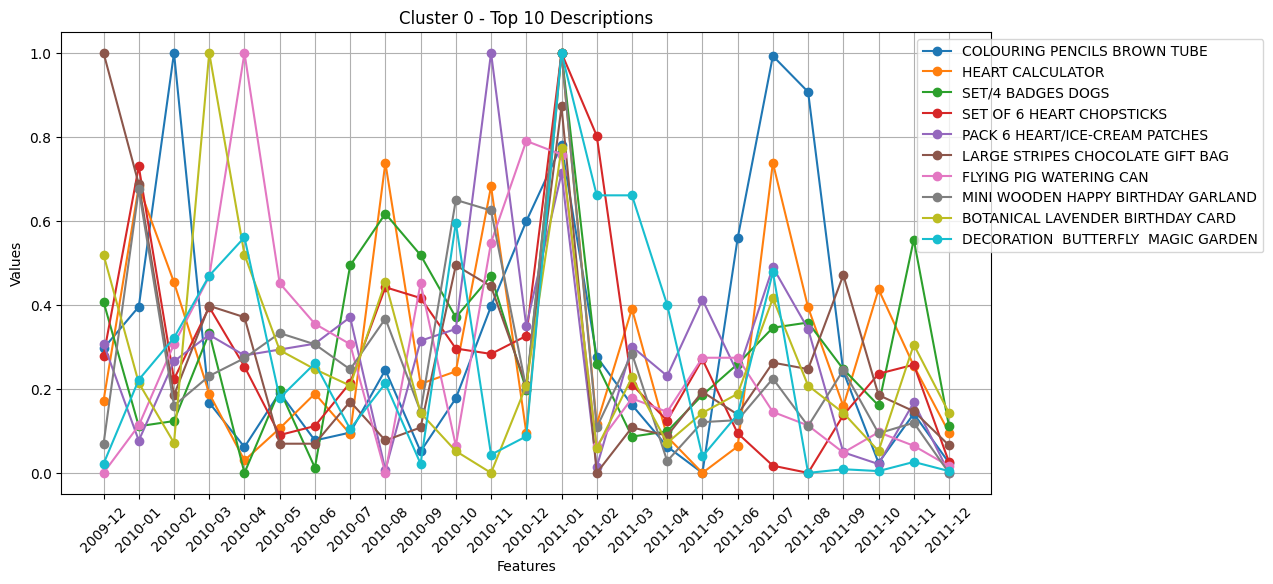

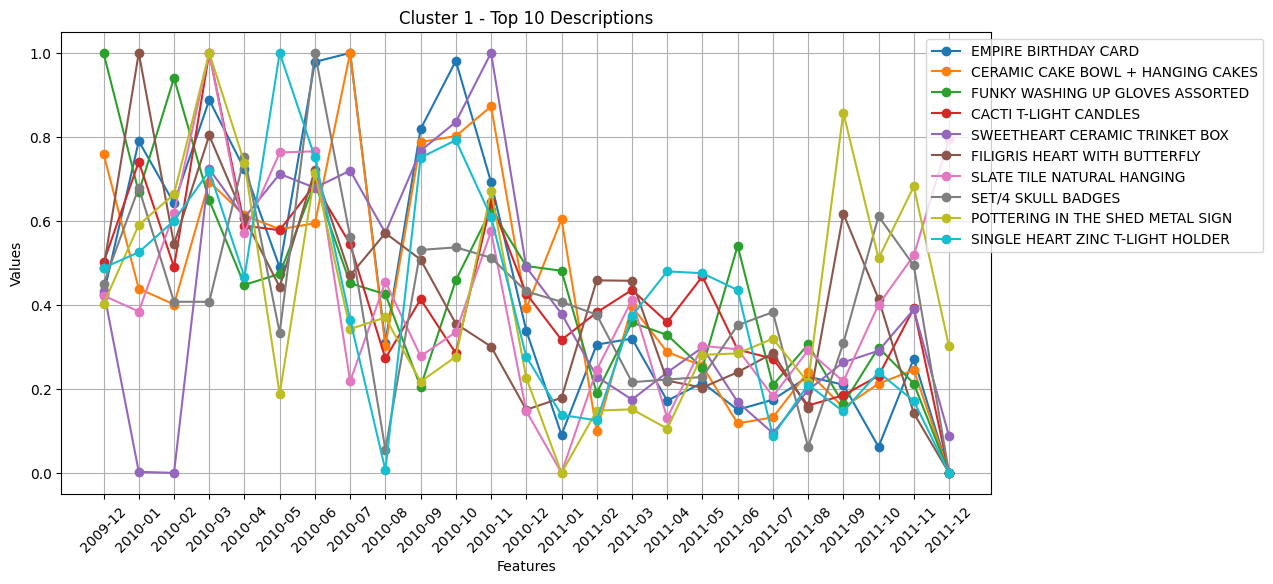

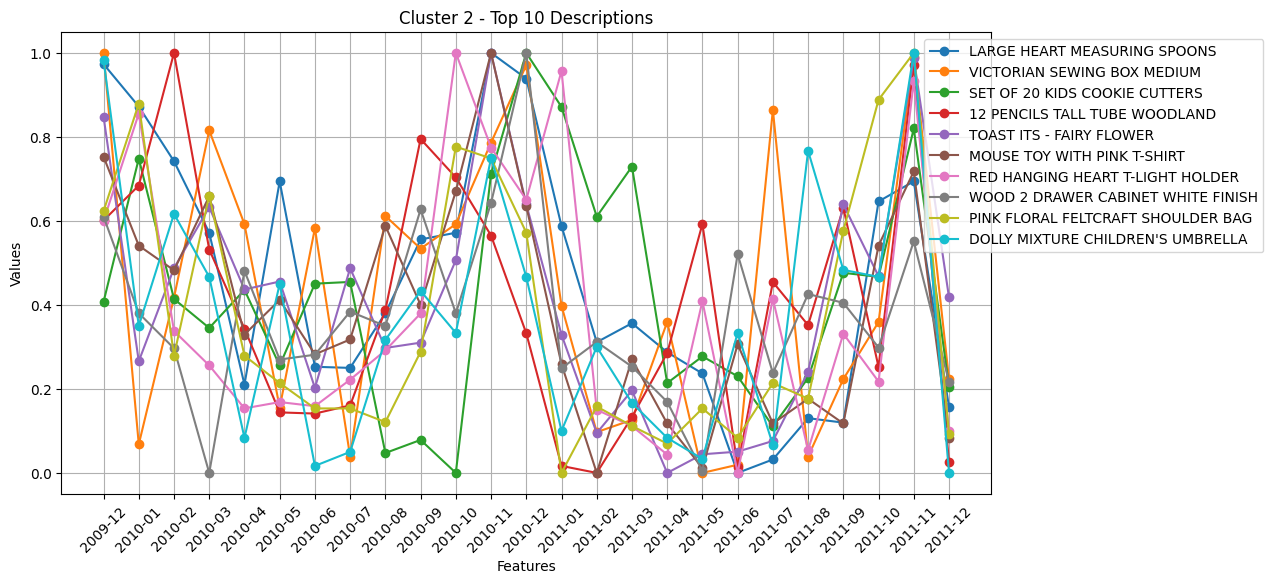

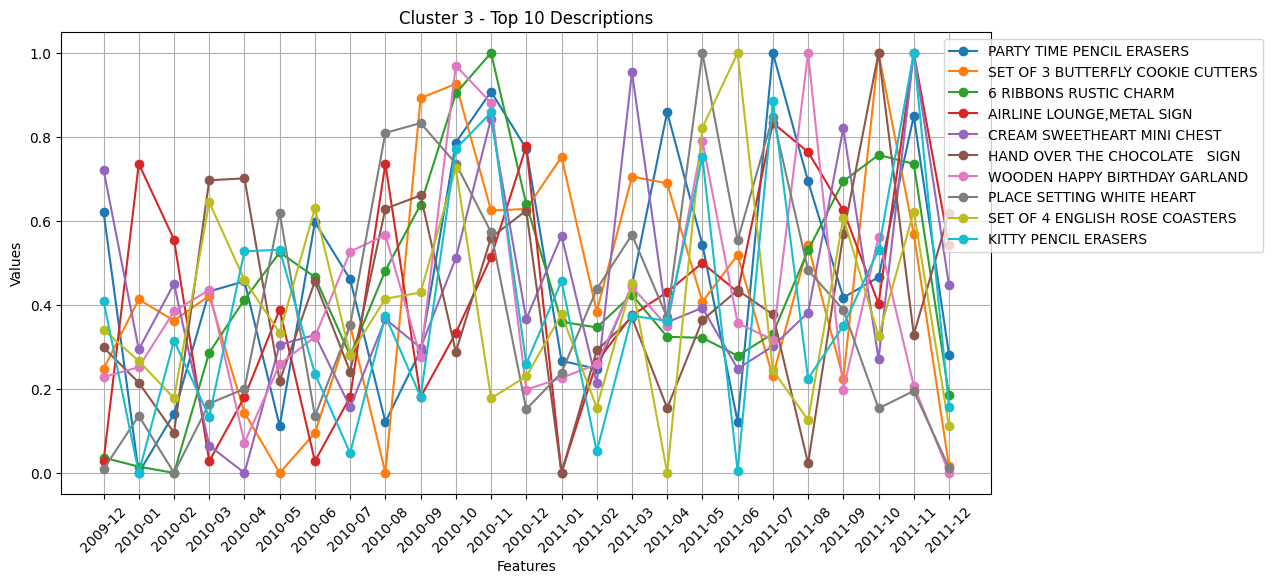

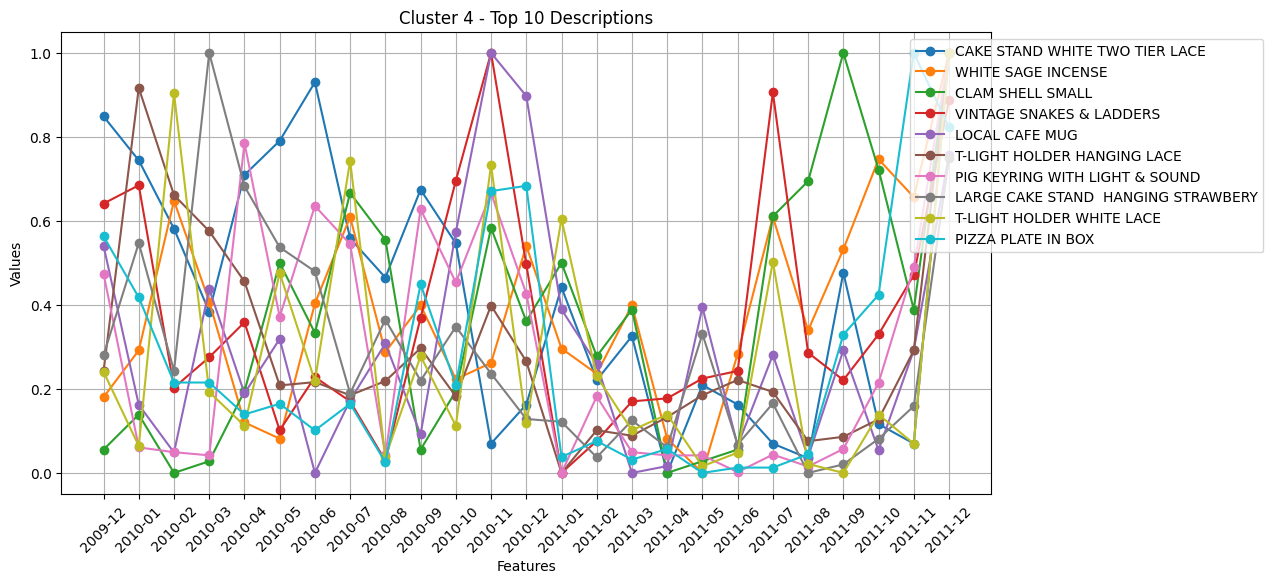

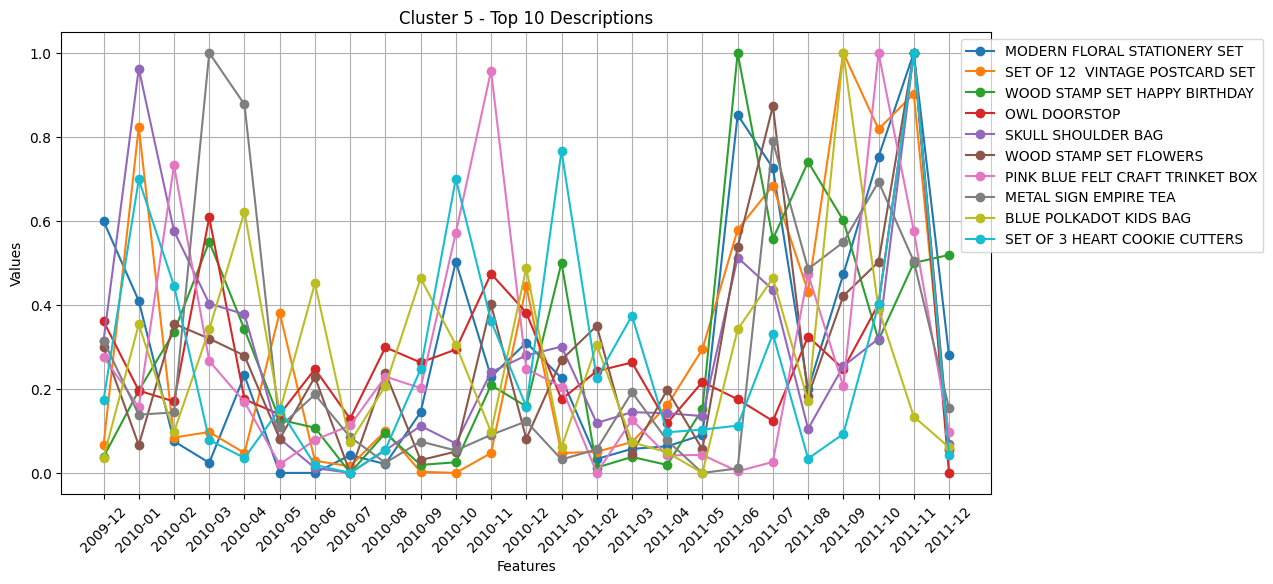

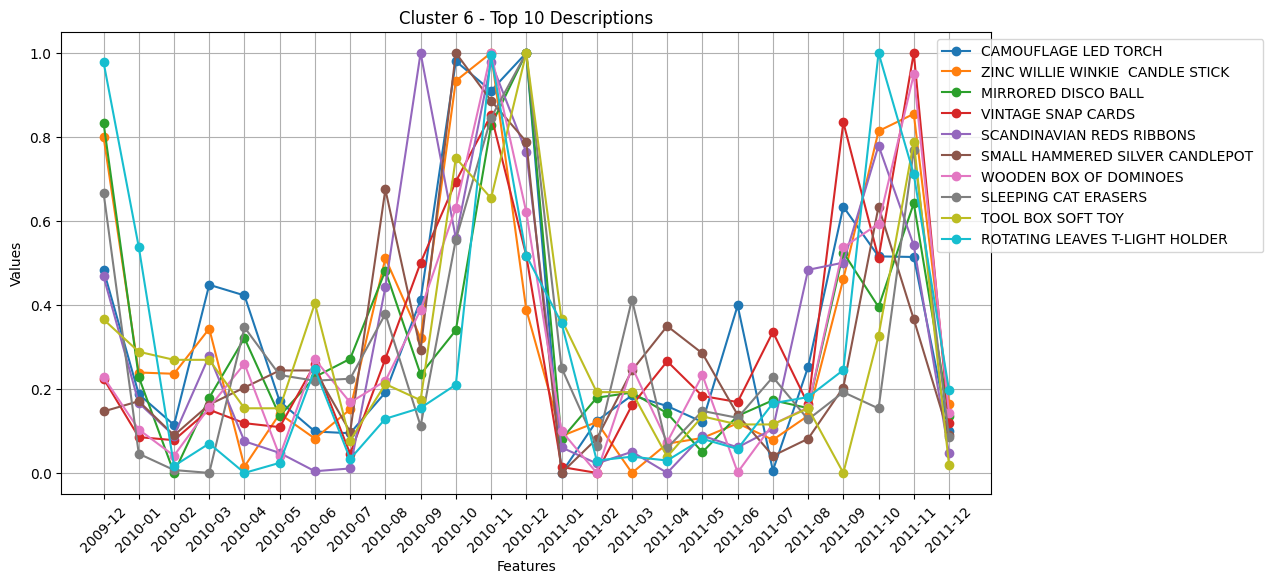

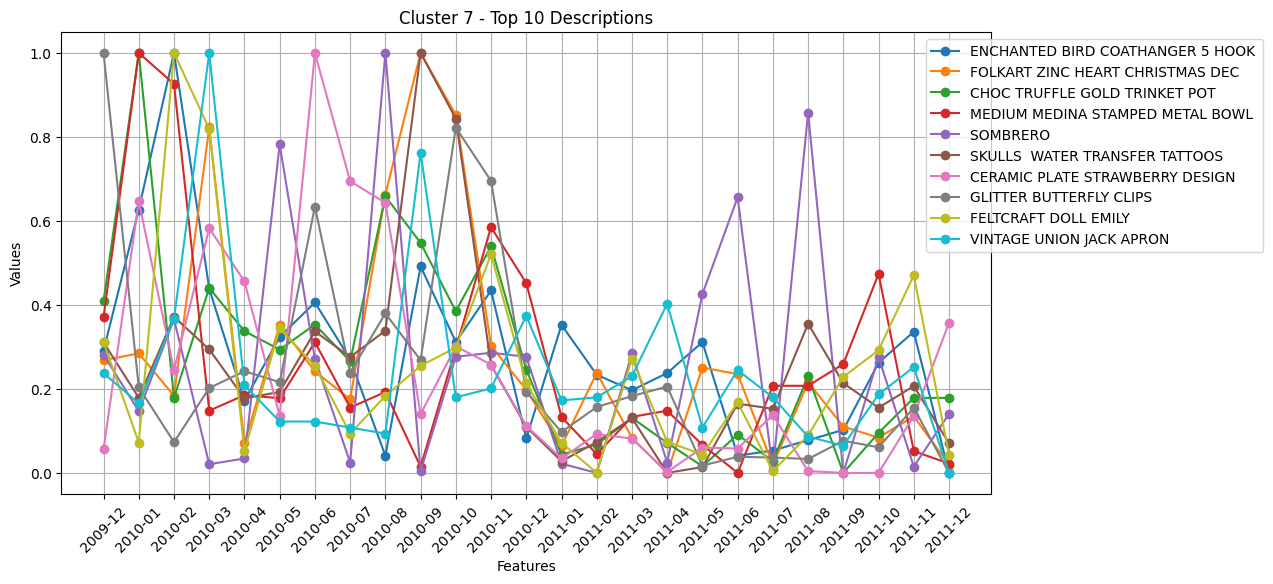

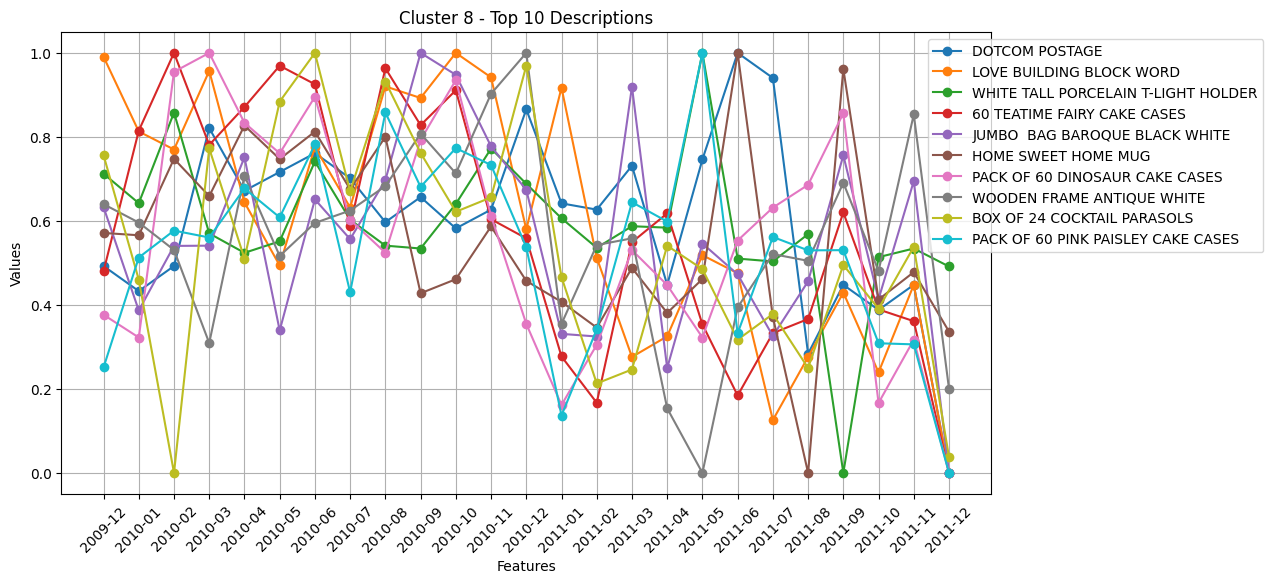

In [16]:
import matplotlib.pyplot as plt

# Identify feature columns (exclude last two: "description" and "total_normalized_quantity")
feature_columns = df.columns[1:-3]  # Exclude last two columns

# Iterate through each cluster
for cluster_id in sorted(df["cluster"].unique()):
    # Get top 10 descriptions based on "total_normalized_quantity"
    top_descriptions = df[df["cluster"] == cluster_id].nlargest(10, "total_normalized_quantity")
    # top_descriptions = df[df["cluster"] == cluster_id]#.nlargest(10, "total_normalized_quantity")

    # Plot
    plt.figure(figsize=(12, 6))
    
    for _, row in top_descriptions.iterrows():
        plt.plot(feature_columns, row[feature_columns], marker="o", label=row[target_column])  # Line for each description

    plt.title(f"Cluster {cluster_id} - Top 10 Descriptions")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1))  # Adjust legend position
    plt.grid(True)
    
    plt.show()


In [ ]:
clusters = df[['description', 'cluster']]

In [25]:
clusters.to_csv("data_based_clusters.csv", index=False)